### Loading Time Series in Pandas

In [10]:
# Import the libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

import statsmodels.tsa.api as smt    #statsmodel : imp pandas package #tsa : time series analysis

from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 8

In [11]:
# Read the data

cleanData = pd.read_csv('Dataset/clean_data.csv')
print(cleanData.head())

         Date  Price
0  1987-05-20  18.63
1  1987-05-21  18.45
2  1987-05-22  18.55
3  1987-05-25  18.60
4  1987-05-26  18.63


In [12]:
# Analyzing the structure of the data : data type

print(cleanData.dtypes)

Date      object
Price    float64
dtype: object


In [13]:
# Detailed info

cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7641 entries, 0 to 7640
Data columns (total 2 columns):
Date     7641 non-null object
Price    7641 non-null float64
dtypes: float64(1), object(1)
memory usage: 119.5+ KB


In [14]:
# Creating a lambda function to convert the datatype to Datetime Index

dt = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
cleanData = pd.read_csv('Dataset/clean_data.csv', parse_dates=['Date'], index_col='Date', date_parser=dt)
cleanData = cleanData.resample('M').sum()    # Monthly data
cleanData.head()

,Price
Date,
1987-05-31,148.64
1987-06-30,396.07
1987-07-31,456.70
1987-08-31,398.57
1987-09-30,402.89


In [15]:
# Detailed info to check if the data type is DatetimeIndex

cleanData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 1987-05-31 to 2017-06-30
Freq: M
Data columns (total 1 columns):
Price    362 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


In [16]:
oilPrice = cleanData['Price'] 
oilPrice.head(10)

Date
1987-05-31    148.64
1987-06-30    396.07
1987-07-31    456.70
1987-08-31    398.57
1987-09-30    402.89
1987-10-31    412.67
1987-11-30    373.40
1987-12-31    375.19
1988-01-31    301.49
1988-02-29    330.32
Freq: M, Name: Price, dtype: float64

In [17]:
# Checking the index of price column

type(oilPrice.index)

pandas.core.indexes.datetimes.DatetimeIndex

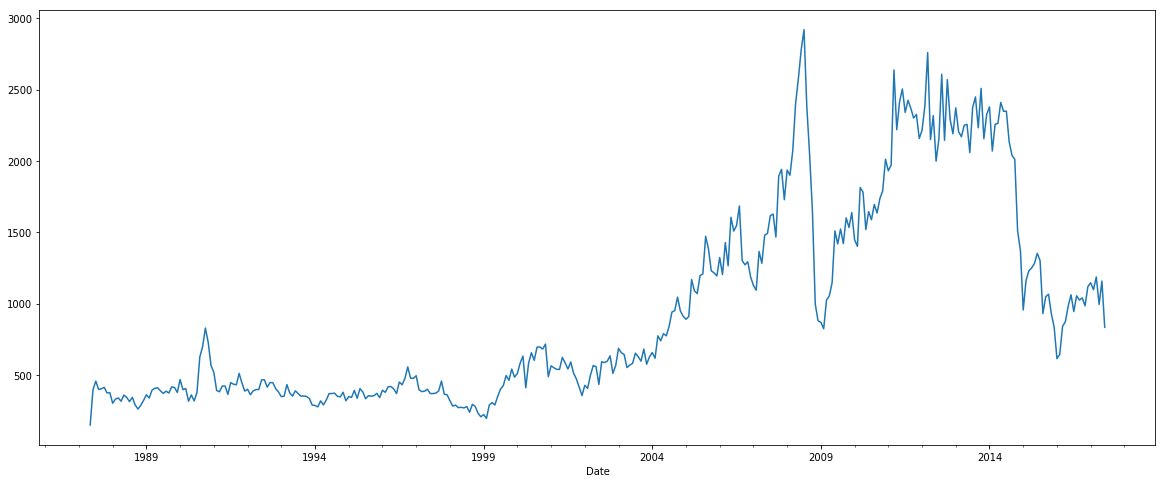

In [18]:
oilPrice.plot()

### Data Decomposition

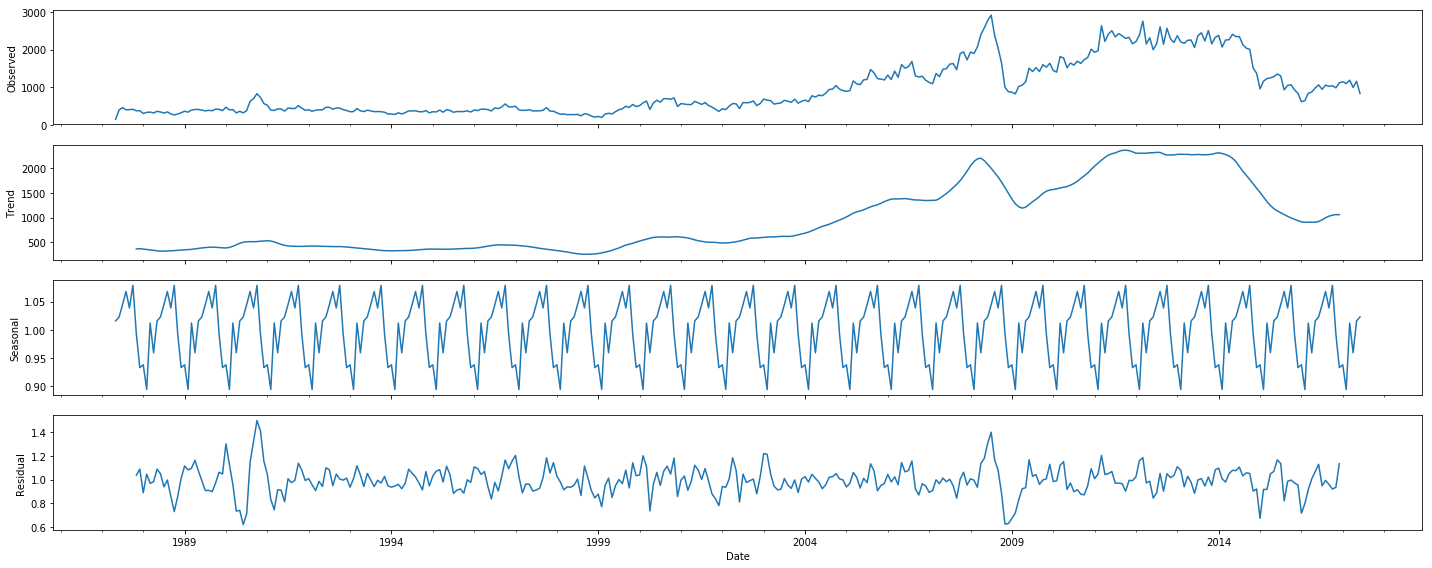

In [19]:
# Let's try decomposing the series to see individual components of the series.
from statsmodels.tsa.seasonal import seasonal_decompose
result_dec = seasonal_decompose(cleanData['Price'], model = 'multiplicative')
fig_plot = result_dec.plot()

In [20]:
pd.DataFrame(result_dec.trend)

,Price
Date,
1987-05-31,NaN
1987-06-30,NaN
1987-07-31,NaN
1987-08-31,NaN
1987-09-30,NaN
1987-10-31,NaN
1987-11-30,362.933750
1987-12-31,369.440417
1988-01-31,361.200833


In [21]:
result_dec.seasonal

Date
1987-05-31    1.015871
1987-06-30    1.022923
1987-07-31    1.044625
1987-08-31    1.067968
1987-09-30    1.038858
1987-10-31    1.078736
1987-11-30    0.992766
1987-12-31    0.933349
1988-01-31    0.938388
1988-02-29    0.894712
1988-03-31    1.012214
1988-04-30    0.959589
1988-05-31    1.015871
1988-06-30    1.022923
1988-07-31    1.044625
1988-08-31    1.067968
1988-09-30    1.038858
1988-10-31    1.078736
1988-11-30    0.992766
1988-12-31    0.933349
1989-01-31    0.938388
1989-02-28    0.894712
1989-03-31    1.012214
1989-04-30    0.959589
1989-05-31    1.015871
1989-06-30    1.022923
1989-07-31    1.044625
1989-08-31    1.067968
1989-09-30    1.038858
1989-10-31    1.078736
                ...   
2015-01-31    0.938388
2015-02-28    0.894712
2015-03-31    1.012214
2015-04-30    0.959589
2015-05-31    1.015871
2015-06-30    1.022923
2015-07-31    1.044625
2015-08-31    1.067968
2015-09-30    1.038858
2015-10-31    1.078736
2015-11-30    0.992766
2015-12-31    0.933349
2016-0

In [22]:
output = pd.DataFrame(pd.concat([pd.DataFrame(result_dec.observed),pd.DataFrame(result_dec.trend), pd.DataFrame(result_dec.seasonal), pd.DataFrame(result_dec.resid)],axis=1))
output.columns = list(['Actual', 'Trend', 'Seasonal', 'Resid'])
output

,Actual,Trend,Seasonal,Resid
Date,,,,
1987-05-31,148.64,NaN,1.015871,NaN
1987-06-30,396.07,NaN,1.022923,NaN
1987-07-31,456.70,NaN,1.044625,NaN
1987-08-31,398.57,NaN,1.067968,NaN
1987-09-30,402.89,NaN,1.038858,NaN
1987-10-31,412.67,NaN,1.078736,NaN
1987-11-30,373.40,362.933750,0.992766,1.036334
1987-12-31,375.19,369.440417,0.933349,1.088084
1988-01-31,301.49,361.200833,0.938388,0.889491


In [23]:
output.columns = list(['Actual', 'Trend', 'Seasonal', 'Resid'])
output.head(10)

,Actual,Trend,Seasonal,Resid
Date,,,,
1987-05-31,148.64,NaN,1.015871,NaN
1987-06-30,396.07,NaN,1.022923,NaN
1987-07-31,456.70,NaN,1.044625,NaN
1987-08-31,398.57,NaN,1.067968,NaN
1987-09-30,402.89,NaN,1.038858,NaN
1987-10-31,412.67,NaN,1.078736,NaN
1987-11-30,373.40,362.933750,0.992766,1.036334
1987-12-31,375.19,369.440417,0.933349,1.088084
1988-01-31,301.49,361.200833,0.938388,0.889491


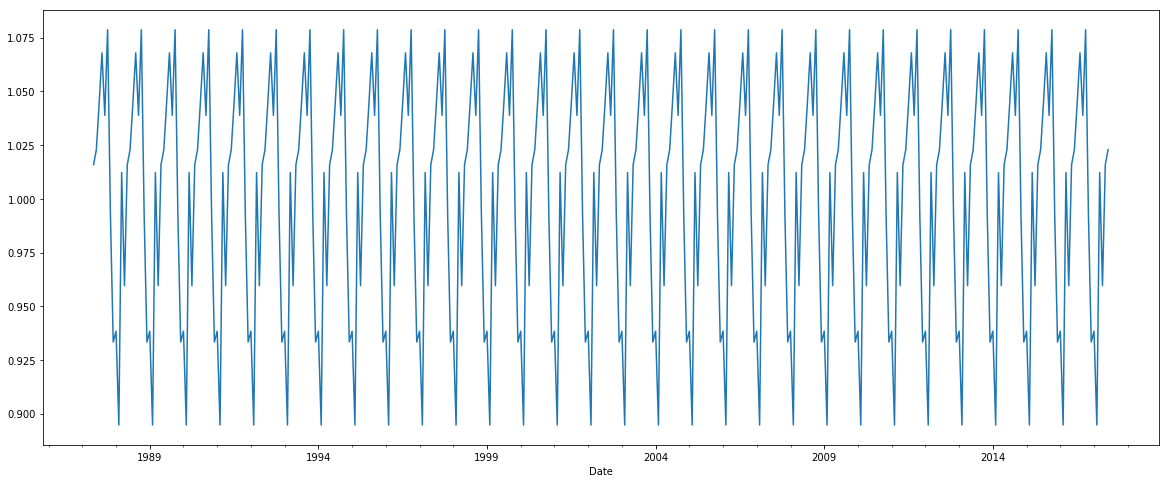

In [24]:
result_dec.seasonal.plot()

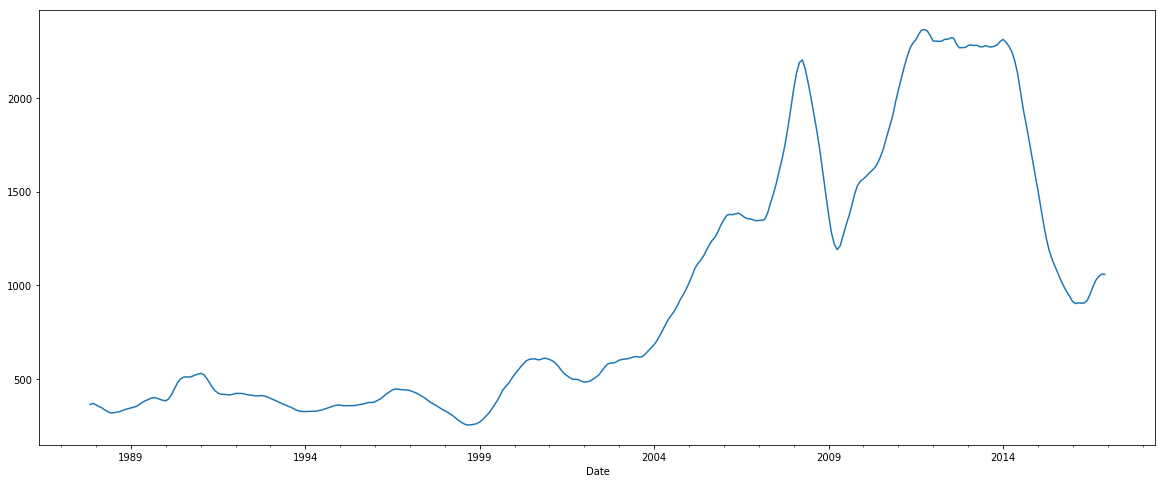

In [25]:
result_dec.trend.plot()

### Check if the time series is stationary

In [26]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(timeseries):
    """
    Pass in a time series, returns ADF report
    """
    #Determing rolling statistics
    rollingMean = oilPrice.rolling(window = 12).mean()
    rollingStd = oilPrice.rolling(window = 12).std()
    
    #Plot rolling statistics:
    original = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rollingMean, color='red', label='Rolling Mean')
    std = plt.plot(rollingStd, color='black', label = 'Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Oil Prices')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Augmented Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    test = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    print(adfoutput)

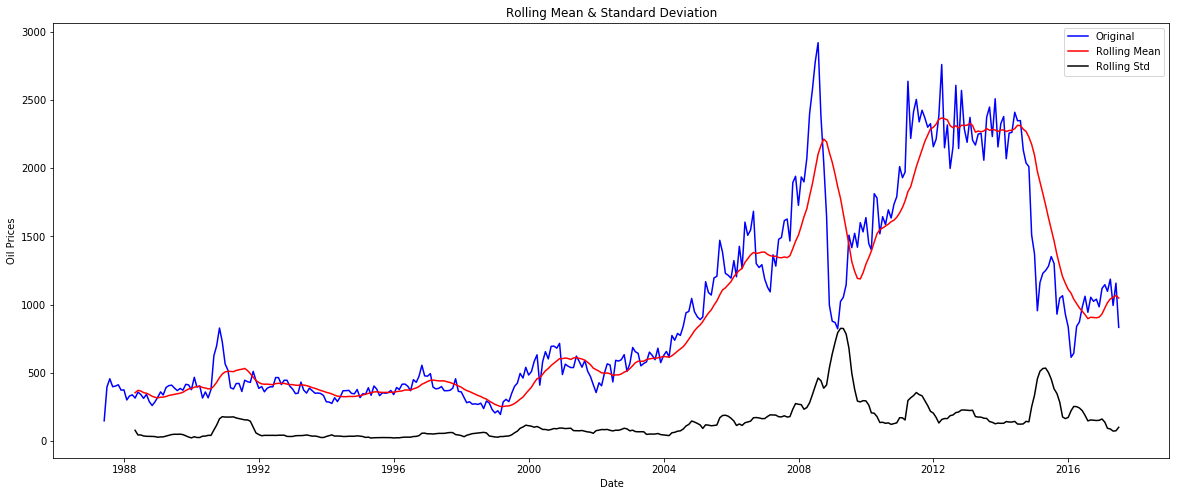

Results of Dickey-Fuller Test:
Test Statistic                  -1.352712
p-value                          0.604725
#Lags Used                      16.000000
Number of Observations Used    345.000000
Critical Value (1%)             -3.449447
Critical Value (5%)             -2.869954
Critical Value (10%)            -2.571253
dtype: float64


In [27]:
stationarity_test(oilPrice)

In [28]:
adfuller(oilPrice, autolag='AIC')

(-1.35271224925506,
 0.6047249968628248,
 16,
 345,
 {'1%': -3.4494474563375737,
  '5%': -2.8699542285903887,
  '10%': -2.5712527305187987},
 4294.4824173611105)

In [29]:
from statsmodels.tsa.stattools import adfuller

result_adf = adfuller(oilPrice)

In [30]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result_adf,labels):
    print(label+' : '+str(value) )
    
if result_adf[1] <= 0.05:
    print("Since we have a strong evidence against the null hypothesis, we reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Since we have a weak evidence against null hypothesis. The time series has a unit root and is non-stationary")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.35271224925506
p-value : 0.6047249968628248
#Lags Used : 16
Number of Observations Used : 345
Since we have a weak evidence against null hypothesis. The time series has a unit root and is non-stationary 


#### Since the ADF test results show that the time series is non-stationary, we need to convert it to a stationary time series.
#### There are mainly two reasons for the non-stationarity in a time series namely trend and seasonality.

#### Here, we apply Differencing to obtain a stationary time series.

In [32]:
# We create a function here in case we need to perform the ADF test again and again to check the stationarity of time series
def adf(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result_adf = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result_adf,labels):
        print(label+' : '+str(value) )
    
    if result_adf[1] <= 0.05:
        print("Since we have a strong evidence against the null hypothesis, we reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Since we have a weak evidence against null hypothesis. The time series has a unit root and is non-stationary")

## Estimating & Eliminating Trend

#### Lets take a log transform here for simplicity:

Text(0.5, 0, 'Date')

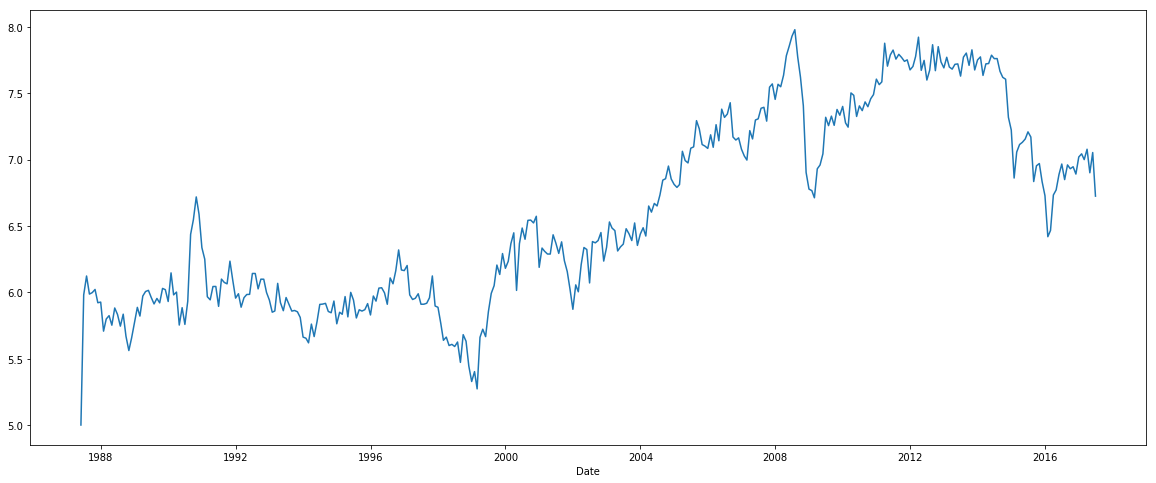

In [33]:
oil_log = np.log(oilPrice)
plt.plot(oil_log)
plt.xlabel('Date')

In [34]:
adf(oil_log)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.428389290748735
p-value : 0.5685928270692443
#Lags Used : 16
Number of Observations Used : 345
Since we have a weak evidence against null hypothesis. The time series has a unit root and is non-stationary


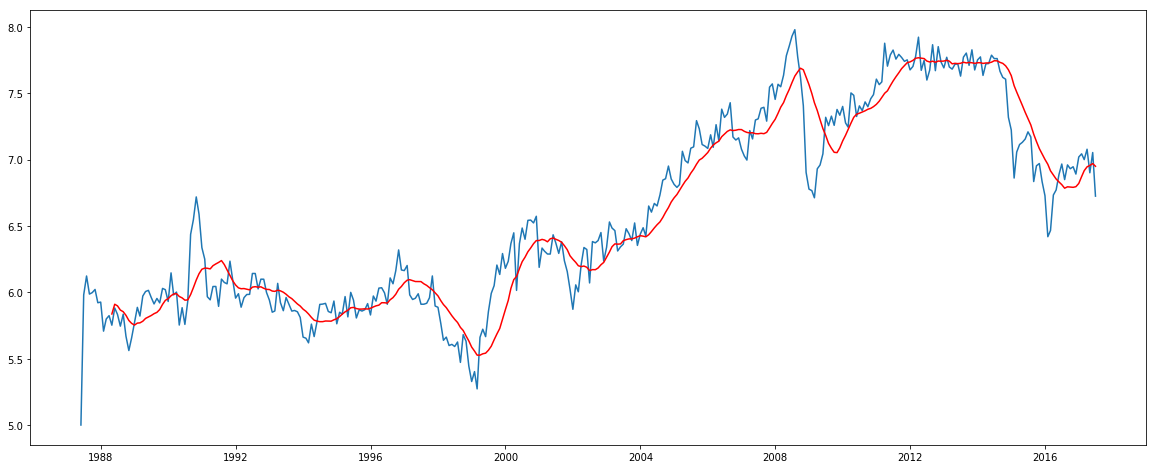

In [35]:
import pandas as pd

moving_avg = oil_log.rolling(window = 12).mean()
plt.plot(oil_log)
plt.plot(moving_avg, color='red')

In [36]:
oil_log_moving_avg_diff = oil_log - moving_avg
oil_log_moving_avg_diff

Date
1987-05-31         NaN
1987-06-30         NaN
1987-07-31         NaN
1987-08-31         NaN
1987-09-30         NaN
1987-10-31         NaN
1987-11-30         NaN
1987-12-31         NaN
1988-01-31         NaN
1988-02-29         NaN
1988-03-31         NaN
1988-04-30   -0.084298
1988-05-31   -0.028244
1988-06-30   -0.064381
1988-07-31   -0.121210
1988-08-31   -0.018539
1988-09-30   -0.157864
1988-10-31   -0.226562
1988-11-30   -0.109299
1988-12-31    0.018519
1989-01-31    0.118583
1989-02-28    0.051293
1989-03-31    0.189722
1989-04-30    0.202792
1989-05-31    0.200389
1989-06-30    0.136676
1989-07-31    0.073489
1989-08-31    0.104969
1989-09-30    0.050693
1989-10-31    0.120492
                ...   
2015-01-31   -0.695448
2015-02-28   -0.451450
2015-03-31   -0.344300
2015-04-30   -0.278283
2015-05-31   -0.200775
2015-06-30   -0.100888
2015-07-31   -0.090546
2015-08-31   -0.356680
2015-09-30   -0.182341
2015-10-31   -0.112615
2015-11-30   -0.208614
2015-12-31   -0.273385
2016-0

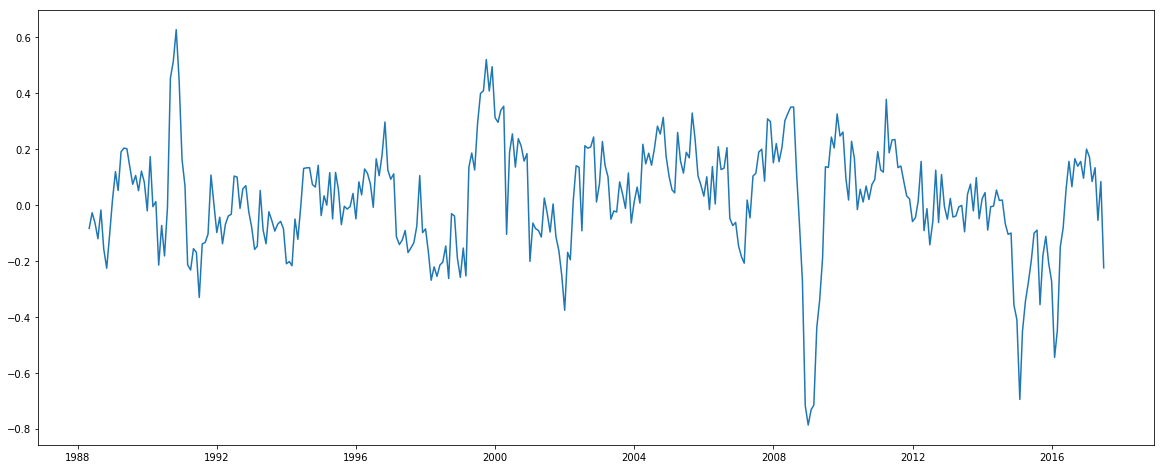

In [37]:
plt.plot(oil_log_moving_avg_diff)

In [41]:
oil_log_moving_avg_diff.dropna(inplace=True)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.991852032214133
p-value : 1.7380786519428347e-07
#Lags Used : 15
Number of Observations Used : 345
Since we have a strong evidence against the null hypothesis, we reject the null hypothesis. Data has no unit root and is stationary


Text(0.5, 0, 'Date')

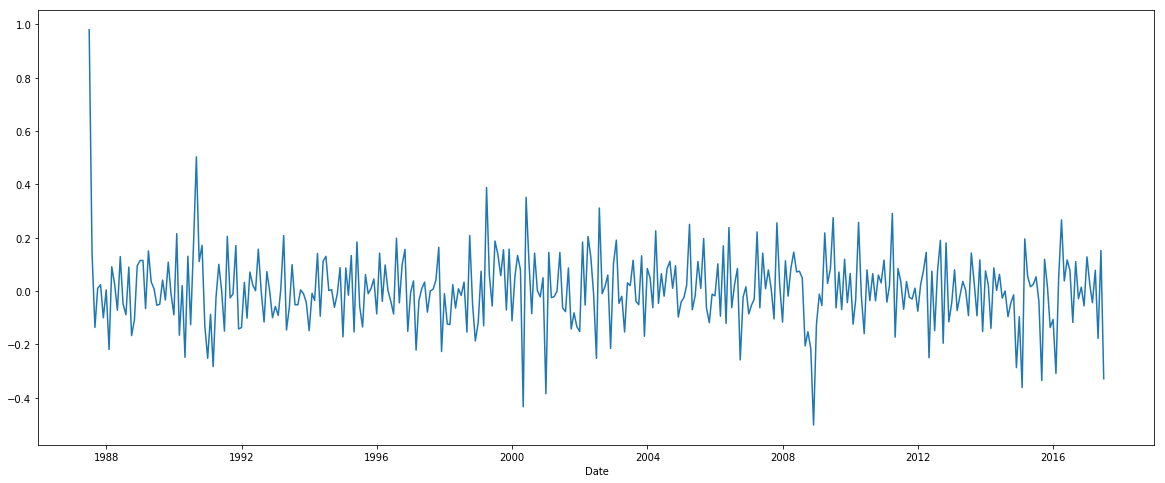

In [44]:
oil_log_diff = oil_log - oil_log.shift()
oil_log_diff.dropna(inplace=True)
adf(oil_log_diff)
plt.plot(oil_log_diff)
plt.xlabel('Date')

### Since differencing is applied only once to get a stationary time series, therefore d = 1.

## Auto - Correlation (ACF) Plot and Partial Auto - Correlation (PACF) PLot

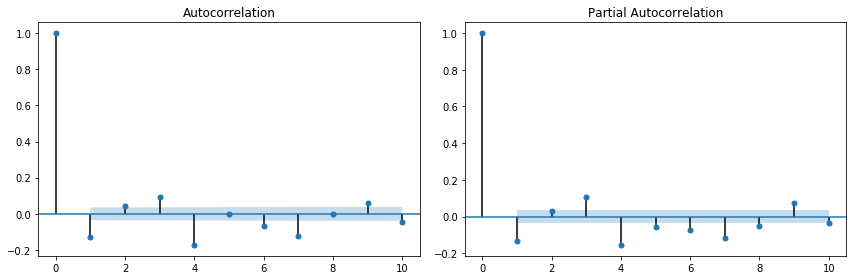

In [46]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(oil_log_diff, lags=10, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(oil_log_diff, lags=10, ax=axes[1], alpha=0.5)
plt.tight_layout()


## ARIMA Model

In [47]:
#We need to load the ARIMA model first:

from statsmodels.tsa.arima_model import ARIMA

model =ARIMA(oil_log, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  361
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 203.989
Method:                       css-mle   S.D. of innovations              0.138
Date:                Wed, 07 Aug 2019   AIC                           -397.978
Time:                        18:49:43   BIC                           -378.533
Sample:                    06-30-1987   HQIC                          -390.247
                         - 06-30-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0044      0.006      0.733      0.464      -0.007       0.016
ar.L1.D.Price    -0.8617      0.143     -6.031      0.000      -1.142      -0.582
ar.L2.D.Price    -0.1701      0.057     

In [48]:
#AR Model

model1 = ARIMA(oil_log, order=(2, 1, 0))
results_AR = model1.fit(disp=-1) 
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  361
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 202.917
Method:                       css-mle   S.D. of innovations              0.138
Date:                Wed, 07 Aug 2019   AIC                           -397.834
Time:                        18:50:07   BIC                           -382.279
Sample:                    06-30-1987   HQIC                          -391.650
                         - 06-30-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0046      0.006      0.711      0.478      -0.008       0.017
ar.L1.D.Price    -0.1487      0.057     -2.596      0.010      -0.261      -0.036
ar.L2.D.Price     0.0272      0.057     

P > |Z| is insignificant; should be less than 0.05.

In [49]:
#MA Model

model2 = ARIMA(oil_log, order=(0, 1, 2))
results_MA = model2.fit(disp=-1) 
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  361
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 203.815
Method:                       css-mle   S.D. of innovations              0.138
Date:                Wed, 07 Aug 2019   AIC                           -399.631
Time:                        18:50:41   BIC                           -384.075
Sample:                    06-30-1987   HQIC                          -393.446
                         - 06-30-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0048      0.007      0.686      0.493      -0.009       0.018
ma.L1.D.Price    -0.1606      0.057     -2.822      0.005      -0.272      -0.049
ma.L2.D.Price     0.1209      0.071     

In [50]:
#ARMA Model

model3 = ARIMA(oil_log, order=(2, 2, 1))   #ARMA Model
results_ARMA = model3.fit(disp=-1) 
print(results_ARMA.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Price   No. Observations:                  360
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 199.276
Method:                       css-mle   S.D. of innovations              0.138
Date:                Wed, 07 Aug 2019   AIC                           -388.553
Time:                        18:51:10   BIC                           -369.122
Sample:                    07-31-1987   HQIC                          -380.827
                         - 06-30-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.105e-05   6.26e-05     -0.975      0.330      -0.000    6.17e-05
ar.L1.D2.Price    -0.1457      0.057     -2.538      0.012      -0.258      -0.033
ar.L2.D2.Price     0.0302      0.057

#### We select the model with parameter p = 2, q = 1 and d = 1 based on AIC, BIC and p|z| < 0.05

#### Residuals for the selected model

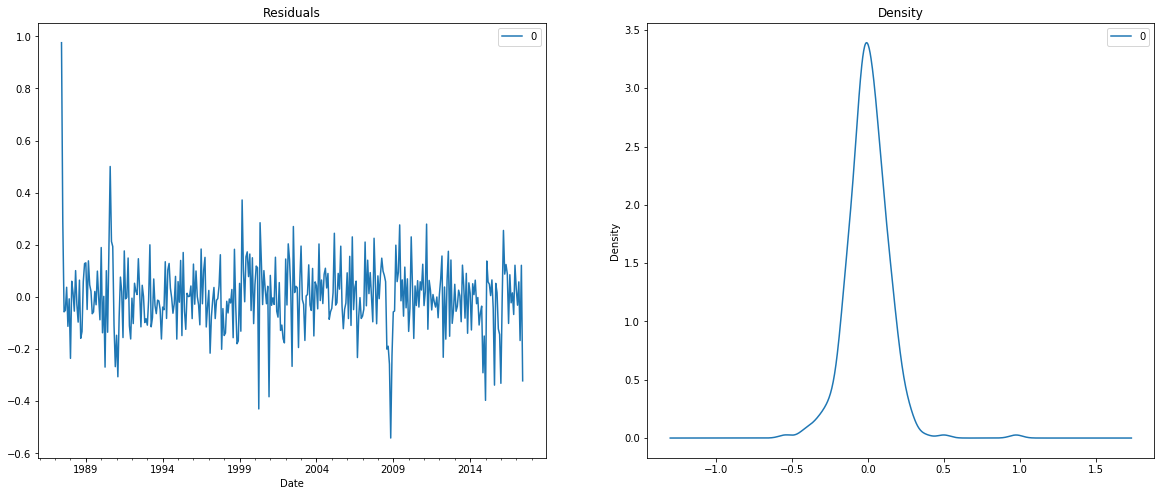

In [52]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

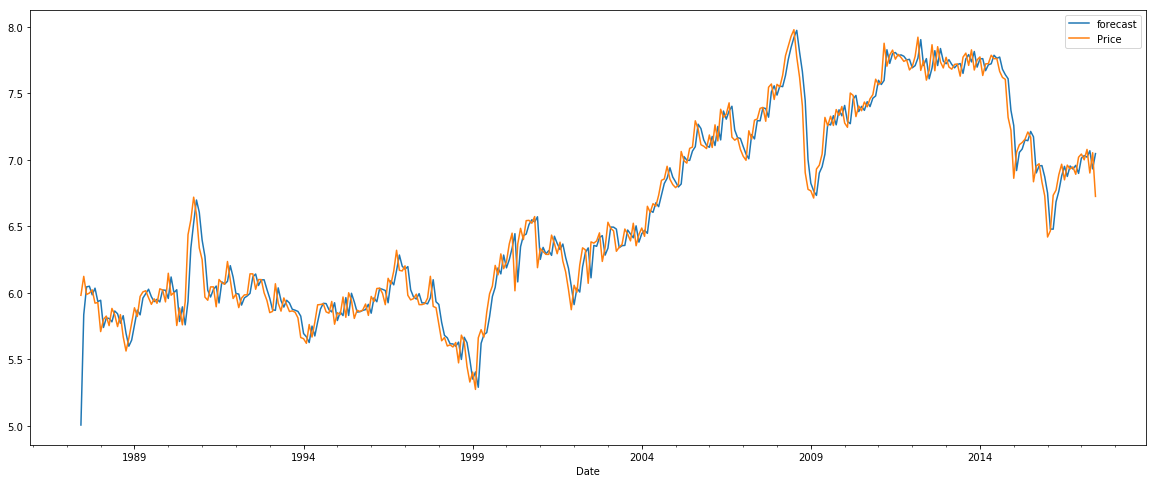

In [53]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [54]:
arima_pred = model_fit.predict(oil_log.index[253], oil_log.index[-1], typ="levels")

Text(0.5, 1.0, 'RMSE: 0.1372')

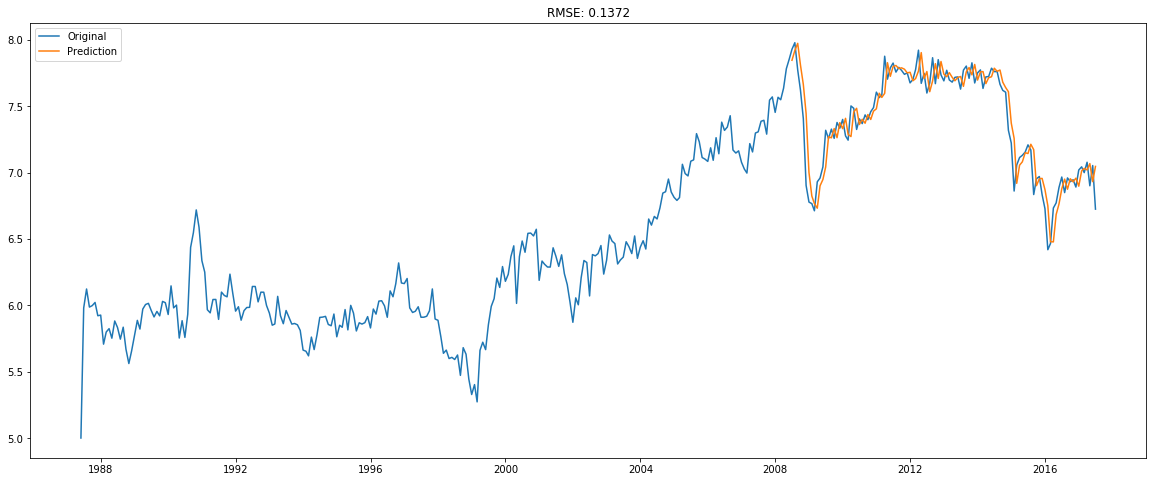

In [55]:
plt.plot(oil_log, label='Original')
plt.plot(arima_pred, label='Prediction')
plt.legend(loc=2)
plt.title('RMSE: %.4f'% np.sqrt(sum((arima_pred-oil_log[253:])**2)/len(oil_log[253:])))

### Forecast

#### Dividing the data into training and test data to get forecast

In [56]:
from statsmodels.tsa.stattools import acf

# Create Training and Test Data
train = oil_log[:253]
test = oil_log[253:]

In [138]:
# Build Model
 
model_fore = ARIMA(train, order=(4,1,3))  
fitted = model_fore.fit(disp=-1) 
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  252
Model:                 ARIMA(4, 1, 3)   Log Likelihood                 159.821
Method:                       css-mle   S.D. of innovations              0.126
Date:                Wed, 07 Aug 2019   AIC                           -301.643
Time:                        20:20:29   BIC                           -269.878
Sample:                    06-30-1987   HQIC                          -288.861
                         - 05-31-2008                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0078      0.002      3.471      0.001       0.003       0.012
ar.L1.D.Price    -0.2546      0.072     -3.531      0.000      -0.396      -0.113
ar.L2.D.Price     0.0986      0.028     

In [139]:
# Forecast
fc, se, conf = fitted.forecast(109, alpha=0.05)  

In [140]:
# Make as pandas series
fc_ser = pd.Series(fc, index=test.index)
lower_ser = pd.Series(conf[:, 0], index=test.index)
upper_ser = pd.Series(conf[:, 1], index=test.index)

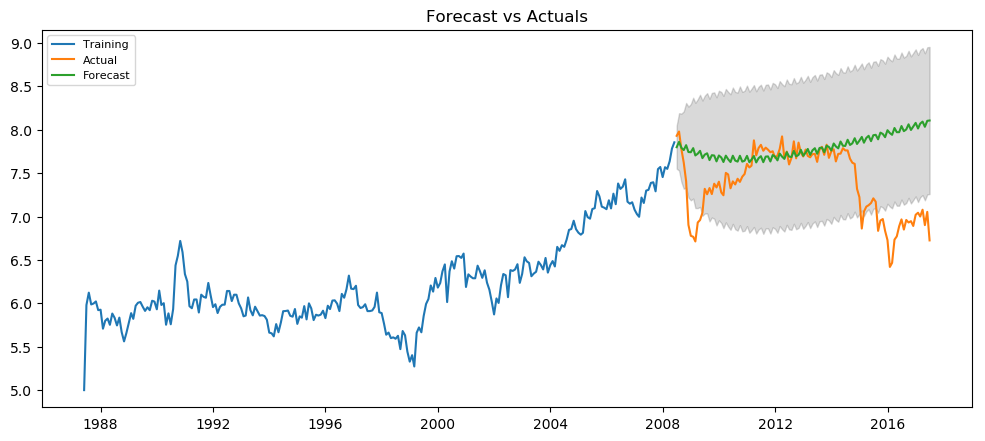

In [141]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_ser, label='Forecast')
plt.fill_between(lower_ser.index, lower_ser, upper_ser, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

 The forecast plot contains Date on the x-axis and log value of the data on the y-axis. After trying different combinations of parametr, we select the model with parameters p = 4, d = 1, q = 3 as it gives the lowest rmse value.

In [142]:
# Accuracy metrics
def accuracy_metrics(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

accuracy_metrics(fc, test.values)

{'mape': 0.06434332567000887,
 'me': 0.4164166953847866,
 'mae': 0.45101413539083013,
 'mpe': 0.05992660106223649,
 'rmse': 0.6322461105602255,
 'acf1': 0.93946767053385,
 'corr': -0.5867316560286242,
 'minmax': 0.05707290708407564}